# Στοχαστικές Διεργασίες και Βελτιστοποίηση στη Μηχανική Μάθηση

## 2ο Εργαστήριο - *k-means*

- Ονομ/νυμο: Χρήστος Νίκου
- AM: 03400146
- Ιδιότητα: Μεταπτυχιακός φοιτητής Επιστήμης Δεδομένων και Μηχανικής Μάθησης (ΕΔΕΜΜ)
- Ηλεκτρονική Διεύθυνση: christosnikou@mail.ntua.gr / chrisnick92@gmail.com

# Εκφώνηση

<p align="justify">Στην άσκηση αυτή θα μελετήσετε τον αλγόριθμο μη επιβλεπόμενης μάθησης <a href="https://en.wikipedia.org/wiki/K-means_clustering"><i>k-means</i></a>, κατασκευάζοντας ένα σύντομο πρόγραμμα. Για την παρούσα άσκηση θα χρησιμοποιήσετε τη βιβλιοθήκη <i>Scikit-Learn</i> της <i>Python</i>. Συγκεκριμένα, θα διαχωρίσετε σε <i>συστάδες (clusters)</i> 150 παραδείγματα του φυτού <i>Ίρις</i> με βάση το unlabeled dataset που σας δίνεται στο τέλος της εκφώνησης και με βάση αυτό μπορείτε να χτίσετε και το ενιαίο πρόγραμμα που θα σας ζητηθεί. Τα <i>χαρακτηριστικά (features)</i> που περιλαμβάνονται στο <i>dataset</i> και που περιγράφουν το κάθε παράδειγμα είναι τα εξής: το <i>μήκος του Σέπαλου (sepal length)</i>, το <i>πλάτος του Σέπαλου (sepal width)</i>, το <i>μήκος των Πετάλων (petal length)</i> και το <i>πλάτος των Πετάλων (petal width)</i>.</p>
<p>Καλείστε να αναπτύξετε ένα ενιαίο πρόγραμμα που να κάνει τα παρακάτω:</p>
<ul>
<li>Να υλοποιεί την μέθοδο <a href="https://en.wikipedia.org/wiki/Elbow_method_(clustering)"><i>«Elbow»</i></a> στο δείγμα του φυτού <i>Ίρις</i>, ώστε να εντοπίσετε έναν επαρκή αριθμό <i>συστάδων</i>. Τι παρατηρείτε;</li>
<li>Να υλοποιεί τον αλγόριθμο <i>k-means</i> με βάση τον αριθμό <i>συστάδων</i> που βρήκατε στο προηγούμενο ερώτημα. Περιγράψτε πώς λειτουργεί ο αλγόριθμος.</li>
<li>Επιχειρήστε να υλοποιήσετε ελέγχους σχετικά με την απόδοση του αλγορίθμου
(<i>Ακρίβειας – Accuracy</i>, <a href="https://en.wikipedia.org/wiki/Confusion_matrix"><i>Τιμές Μήτρας Λαθών – Error Matrix</i></a>).</li>
</ul>

# Το ενιαίο πρόγραμμα - Η βασική κλάση

Παρακάτω δίνεται ο πηγαίος κώδικας της βασικής κλάσης που θα χρησιμοποιηθεί για την απαντήση των παραπάνω ερωτημάτων. Η λειτουργία της κάθε συνάρτησης δίνεται μαζί με την απάντηση του αντίστοιχου ερωτήματος. 

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import seaborn as sns
 
import pandas as pd
import numpy as np

In [2]:
class kmeans_task():
    def __init__(self, data = None):
        self.X = data  # The features to be clustered
    
    def elbow_method(self, max_clusters):
        K = range(2, max_clusters+1)
        cluster_inertias = []
        for k in K:
            kmeanModel = KMeans(n_clusters=k)
            kmeanModel.fit(self.X)
            cluster_inertias.append(kmeanModel.inertia_)
        
        fig, ax = plt.subplots(figsize = (12,8))
        ax.plot(K, cluster_inertias, "bx-")
        ax.annotate("elbow", xy=(3, cluster_inertias[1]),
                    xytext=(6, 130),arrowprops=dict(facecolor = "b", arrowstyle="->"))
        ax.annotate("elbow", xy=(4, cluster_inertias[2]),
                    xytext=(6, 130),arrowprops=dict(facecolor = "b", arrowstyle="->"))
        ax.set_xlabel("Values of K")
        ax.set_ylabel("Inertia")
        ax.set_title("The elbow method using Inertia")
        plt.show()
        
    def fit(self, data, n_clusters=5):
        self.X = data
        self.n_clusters = n_clusters
        self.model = KMeans(n_clusters = self.n_clusters, random_state = 2)
        self.model.fit(self.X)
    
    def confusion_matrix(self, targets):
        self.targets = targets
        self.preds = self.model.predict(self.X)
        sns.set_theme()
        
        self.cm = sm.confusion_matrix(self.targets, self.preds)
        df_cm = pd.DataFrame(self.cm, index = [i for i in range(self.n_clusters)],
                  columns = [i for i in range(self.n_clusters)])
        
        fig, ax = plt.subplots(figsize = (10,7))
        sns.heatmap(df_cm, annot=True, ax = ax,
                    cmap = sns.color_palette("light:b", as_cmap=True))
        plt.show()
        
        

Πριν ξεκινήσουμε την υλοποίηση του αλγορίθμου *K-means* φορτώνουμε το σύνολο δεδομένων που θα χρησιμοποιήσουμε. Το σύνολο δεδομένων που θα χρησιμοποιήσουμε είναι το *Iris dataset* το οποίο αποτελείται από 150 δείγματα του φυτού [*Iris*](#https://en.wikipedia.org/wiki/Iris_(plant)). Τα χαρακτηριστικά (*features*) που περιλαμβάνονται στο dataset και που περιγράφουν το κάθε παράδειγμα είναι τα εξής: το μήκος του Σέπαλου (*sepal length*), το πλάτος του Σέπαλου (*sepal width*), το μήκος των Πετάλων (*petal length*) και το πλάτος των Πετάλων (*petal width*). Με τις επόμενες εντολές φορτώνουμε τα χαρακτηριστικά και τα *labels* του συνόλου δεδομένων.

In [3]:
# import some data to play with (from sklearn)
iris = datasets.load_iris().data
iris.shape
labels = datasets.load_iris().target

df = pd.DataFrame({"Sepal_Length": iris[:,0], "Sepal_Width": iris[:,1],
                 "Petal_Length": iris[:,2], "Petal_Width": iris[:,3]})
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
print(f"- The dataset contains {len(np.unique(labels))} different classes of the Iris plant.")
print(f"- The dataset contains {len(labels)} samples")
print(f"{- len(labels[labels == 0])} belong to class 0, {len(labels[labels == 1])} to class 1 and {len(labels[labels == 2])} to class 2.")

- The dataset contains 3 different classes of the Iris plant.
- The dataset contains 150 samples
-50 belong to class 0, 50 to class 1 and 50 to class 2.


# Απαντήσεις

## Ερώτημα 1

> *Υλοποιήστε τη μέθοδο [«Elbow»](#https://en.wikipedia.org/wiki/Elbow_method_(clustering)) στο δείγμα του φυτού Ίρις, ώστε να εντοπίσετε έναν επαρκή αριθμό συστάδων. Τι παρατηρείτε;*

Χρησιμοποιώντας τη συνάρτηση *elbow_method* της βασικής κλάσης *kmeans_task* προσδιορίζουμε μέσω της μεθόδου *«Elbow»* τον κατάλληλο αριθμό των συστάδων για να περιγράψουν το σύνολο των δεδομένων μας. Η συνάρτηση *elbow_method* δέχεται ως όρισμα μια παράμετρο *max_clusters* η οποία δείχνει τον μέγιστο αριθμό των συστάδων που θέλουμε να σχηματίσουμε. Ύστερα, για κάθε $2\leq k \leq max\_clusters$ τρέχουμε τον αλγόριθμο *K-means* και υπολογίζουμε την αδράνεια (*inertia*) των συστάδων. Για κάθε $k$ αποθηκεύουμε την αδράνεια σε μια τοπική λίστα εν ονόματι *cluster_inertias* και στο τέλος κατασκευάζουμε ένα σχήμα της αδράνειας συναρτήση των αριθμών των συστάδων $k$. Παρακάτω βλέπουμε την υλοποίηση της μεθόδου *«Elbow»* με $max\_clusters = 10$.

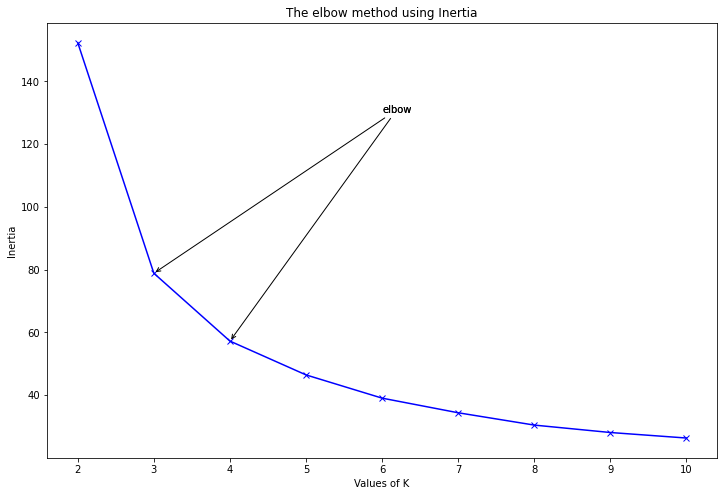

In [5]:
km = kmeans_task(iris) # Initialize the main object
km.elbow_method(max_clusters = 10) # Plot elbows

Αυτό που παρατηρούμε απ' το παραπάνω σχήμα είναι ότι ο κατάλληλος αριθμός των συστάδων για το συγκεκριμένο πρόβλημα είναι $K=3$ ή $K=4$. Όπως βλέπουμε τιμές $K>4$ δεν προσφέρουν ιδιαίτερη μείωση της αδράνειας και μπορεί να οδηγήσουν σε υπερεκπαίδευση του μοντέλου μας (*overfitting*).

## Ερώτημα 2

> *Υλοποιήστε τον αλγόριθμο k-means με βάση τον αριθμό συστάδων που βρήκατε στο προηγούμενο ερώτημα. Περιγράψτε πώς λειτουργεί ο αλγόριθμος.*

Σε αυτό το σημείο χρησιμοποιούμε τον αριθμό για το $K$ που προσδιορίσαμε μέσω της μεθόδου *Elbow* για να εκπαιδεύσουμε το μοντέλο με τον αλγόριθμο *K-means*. Θα χρησιμοποιήσουμε τις δύο τιμές για το $K$ που βρήκαμε προηγουμένως, δηλαδή $K=3,4$. Αν έχουμε ένα σύνολο χαρακτηριστικών $X$ το οποίο περιγράφεται μέσω ενός πίνακα διαστάσεων $(n\_samples, n\_features)$ τότε για σταθερό $K$ ο αλγόριθμος *K-means* λειτουργεί ως εξής:

- Αρχικά αρχικοποιούνται $K$ τυχαία κέντρα στον χώρο διαστάσεων όσο είναι η διάσταση των χαρακτηριστικών $n\_features$.
- Τότε, μέχρις ότου τα κέντρα να μην μεταβάλλονται πάνω από κάποια επιλεγμένη σταθερά $C>0$ επαναλβάνουμε τα εξής:
- Για κάθε κέντρο $x_k^i$ στο $i-$οστό βήμα υπολογίζουμε την απόστασή του από όλα τα σημεία που ανήκουν στη συστάδα που δημιουργεί αυτό το κέντρο. Σαν απόσταση σε αυτό το σημείο μπορεί να χρησιμοποιηθεί οποιαδήποτε απόσταση ικανοποιεί τα αξιώματα
<i><a href="https://en.wikipedia.org/wiki/Metric_(mathematics)">απόστασης</a></i>. Μερικά παραδείγματα συναρτήσεων απόστασης είναι η *Ευκλείδια απόσταση*, η απόσταση *Manhattan* ή γενικότερα η απόσταση που επάγει η $\ell_p$-νόρμα, η λεγόμενη απόσταση <i><a href="https://en.wikipedia.org/wiki/Minkowski_distance">Minkowski</a></i>
- Έχοντας την απόσταση κάθε σημείου του συνόλου δεδομένων από τα κέντρα $x_1^i,\dots,x_K^i$ δημιουργούμε $K$ συστάδες επισυνάπτοντας σε κάθε συστάδα τα σημεία που βρίσκονται εγγύτερα από τα $K$ κέντρα.
- Τέλος, υπολογίζουμε τα νέα κέντρα $x_1^{i+1},\dots,x_K^{i+1}$ ως τον μέσο όρο των σημείων που ανήκουν στη συστάδα του εκάστοτε κέντρου. Πιο συγκεκριμένα, αν τα σημεία $y_1,\dots,y_N$ ανήκουν στη συστάδα που παράγει το κέντρο $x_j^i$ τότε το νέο κέντρο στο βήμα $i+1$ για τη συστάδα $j$ θα υπολογίζεται μέσω της σχέσης
$$ x_j^{i+1} = \frac{1}{N}\bigl(y_1+\dots +y_N\bigr).$$

Στις επόμενες εντολές, προσαρμόζουμε το σύνολο δεδομένων στο μοντέλο του αλγορίθμου *K-means*. Η προσαρμογή του μοντέλου γίνεται μέσω της συνάρτησης *fit* της βασικής κλάσης *kmeans\_task*.

In [6]:
km3 = kmeans_task()
km3.fit(iris, n_clusters = 3)
km4 = kmeans_task()
km4.fit(iris, n_clusters = 4)

Παρκάτω βλέπουμε και την τιμή της *αδράνειας* για κάθε ένα απ'τα παραπάνω μοντέλα.

In [7]:
print(f"- Model with {3} clusters has: {km3.model.inertia_:.3f} inertia")
print(f"- Model with {4} clusters has: {km4.model.inertia_:.3f} inertia")

- Model with 3 clusters has: 78.851 inertia
- Model with 4 clusters has: 57.228 inertia


## Ερώτημα 3

> *Επιχειρήστε να υλοποιήσετε ελέγχους σχετικά με την απόδοση του αλγορίθμου (Ακρίβειας – Accuracy, <i><a href="https://en.wikipedia.org/wiki/Confusion_matrix"> Confusion matrix)</a></i>.*

Χρησιμοποιώντας τη συνάρτηση *confusion_matrix* της βασικής κλάσης αξιολογούμε την απόδοση των παραπάνω μοντέλων $(K=3,4)$ συγκρίνοντας τις προβλέψεις με τις πραγματικές ταμπέλες (*true_labels*) του συνόλου δεδομένων. Πρώτα βλέπουμε τα αποτελέσματα του αλγορίθμου με τις 3 συστάδες.

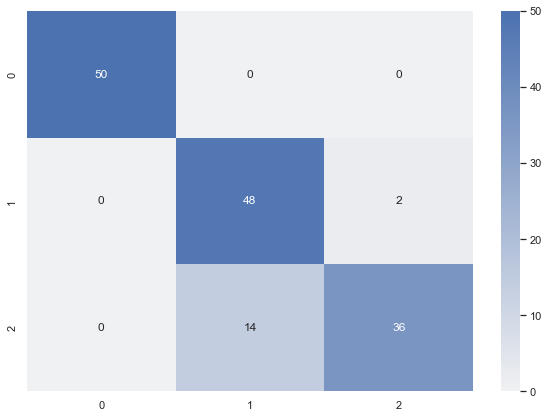

In [8]:
km3.confusion_matrix(labels)

Χρησιμοποιώντας τη συνάρτηση *classification_report* της βιβλιοθήκης *sklearn.metrics* μπορούμε να δούμε και αναλυτικά τις τιμές για το *precision, recall* και το *f1-score* των 3 συστάδων ξεχωριστά.

In [9]:
from sklearn.metrics import classification_report
print(classification_report(km3.targets, km3.preds, target_names=["Class 0", "Class 1", "Class 2"]))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        50
     Class 1       0.77      0.96      0.86        50
     Class 2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



Παρακάτω βλέπουμε και τα αντίστοιχα αποτελέσματα για το μοντέλο με τις 4 συστάδες.

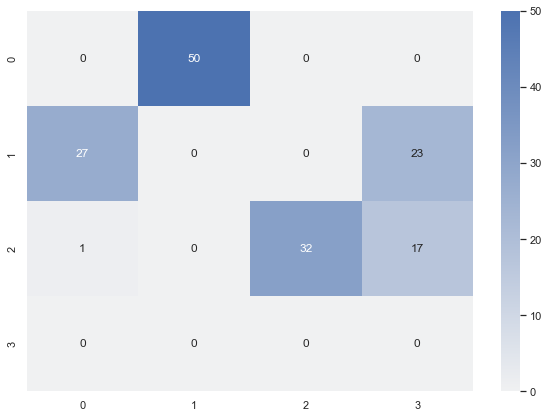

In [10]:
km4.confusion_matrix(labels)

In [11]:
import warnings
warnings.filterwarnings("ignore") # ignore division by zero
print(classification_report(km4.targets, km4.preds, target_names=["Class 0", "Class 1", "Class 2", "Class 3"]))

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        50
     Class 1       0.00      0.00      0.00        50
     Class 2       1.00      0.64      0.78        50
     Class 3       0.00      0.00      0.00         0

    accuracy                           0.21       150
   macro avg       0.25      0.16      0.20       150
weighted avg       0.33      0.21      0.26       150

